In [44]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

In [45]:
# Loading data
file_path = Path("myopia.csv")
df= pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [46]:
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [47]:
df=df.drop(columns=["MYOPIC"])
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [48]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data= scaler.fit_transform(df[['SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

In [49]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [50]:
new_df= pd.DataFrame(scaled_data, columns=df.columns[1:])
# new_df['AGE']= df['AGE']
new_df.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [51]:
file_path= Path("cleaned_df.csv")
new_df.to_csv(file_path, index=False)

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca= PCA(n_components=2 )

myopia_pca=pca.fit_transform(new_df)

In [54]:
df_myopia_pca=pd.DataFrame(
    data= myopia_pca, columns=["principal component 1", "principal component 2"]
)
df_myopia_pca.head()

,principal component 1,principal component 2
0,-0.699191,1.265068
1,0.448621,-1.590858
2,0.810855,-0.753660
3,-0.196022,1.251758
4,-0.303120,-2.698305


In [55]:
sum(pca.explained_variance_ratio_)

0.38142520618193476

In [13]:
#2 principal components only captures 37.3% of data

In [38]:
pca = PCA(n_components=3)


myopia_pca = pca.fit_transform(new_df)

In [39]:
df_myopia_pca = pd.DataFrame(
    data=myopia_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.699191,1.265068,-0.853508
1,0.448621,-1.590858,-1.392399
2,0.810855,-0.753660,1.601548
3,-0.196022,1.251758,-0.633979
4,-0.303120,-2.698305,0.418939


In [40]:
sum(pca.explained_variance_ratio_)
#three principal components is just 47.24% of data

0.47248377189236784

In [41]:
model = KMeans(n_clusters=3, random_state=0)

model.fit(df_myopia_pca)

predictions = model.predict(df_myopia_pca)


df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,-0.699191,1.265068,-0.853508,0
1,0.448621,-1.590858,-1.392399,1
2,0.810855,-0.753660,1.601548,2
3,-0.196022,1.251758,-0.633979,0
4,-0.303120,-2.698305,0.418939,1


In [18]:
from sklearn.manifold import TSNE


In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_myopia_pca)

In [20]:
tsne = TSNE(learning_rate=250, perplexity=50)
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\krcon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [21]:
tsne_features.shape

(618, 2)

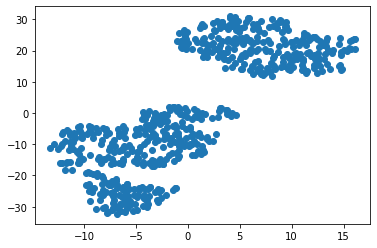

In [35]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

Break


In [23]:
inertia = []
k = list(range(1,11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8034.000000
1,2,6953.025729
2,3,6208.541325
3,4,5889.955742
4,5,5673.040545


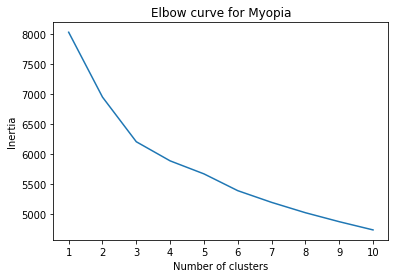

In [24]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

In [25]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=3, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [26]:
clusters= get_clusters(5, df_myopia_pca )

In [27]:
clusters

,principal component 1,principal component 2,principal component 3,class
0,-0.699191,1.265068,-0.853508,2
1,0.448621,-1.590858,-1.392399,0
2,0.810855,-0.753660,1.601548,1
3,-0.196022,1.251758,-0.633979,2
4,-0.303120,-2.698305,0.418939,0
...,...,...,...,...
613,0.173677,1.175715,-1.191865,1
614,0.440848,-1.804437,-1.024569,0
615,0.680561,-2.344081,0.039894,0
616,1.069999,0.404000,0.500919,1


In [30]:
import plotly.express as px
fig= px.scatter_3d(
    df_myopia_pca,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [31]:
def show_clusters(df_myopia_pca):
    plt.scatter(df_myopia_pca['principal component 1'], df_myopia_pca['principal component 2'], c=df_myopia_pca['class'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


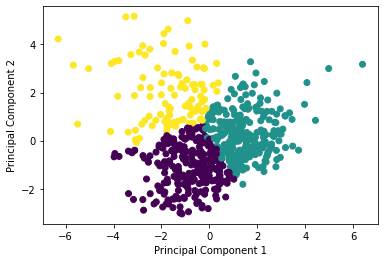

In [32]:
show_clusters(clusters)

In [33]:
def show_clusters(df_myopia_pca):
    plt.scatter(df_myopia_pca['principal component 2'], df_myopia_pca['principal component 3'], c=df_myopia_pca['class'])
    plt.xlabel('Principal Component 2')
    plt.ylabel('Principal Component 3')
    plt.show()

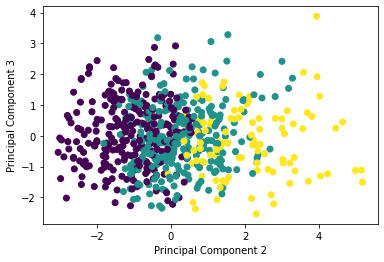

In [34]:
show_clusters(clusters)

## The myopic dataset can be broken down into 3 distinct cluster. This is done by using the principal component method. Using 2 PCA's the amount of data represented is 38% while increasing the PCA's to 3 represents 47.24% of the data. There is a clear grouping of patient characteristics within the dataset. In order to see a better percentage of the data represented in this model, it may be helpful to determine which columns are the most important in predicting myopia and reduce the amount of columns in the dataset. 